# Turkish NLP Pipeline with BERT 

1. Sentiment Analysis
2. NER Model
3. Question Answering
4. Text Summarization *
5. Text Categorization
6. Text Normalization, Spell Checker *

These models are fined tuned based on Turkish-Bert model 

https://github.com/stefan-it/turkish-bert

## Requirements
* python3
* pip install transformers

In [1]:
#!pip install git+https://github.com/huggingface/transformers.git --upgrade

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

In [4]:
import transformers

# Bert 
Paper:
BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
https://arxiv.org/pdf/1810.04805

 *Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova*
 **Google AI Language**

*Abstract*

* We introduce a new language representation model called BERT, which stands for **Bidirectional Encoder Representations from Transformers.** 
* Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from **unlabeled text** by jointly conditioning on *both left and right context* in all layers. 
* BERT alleviates the previously mentioned unidirectionality constraint by using a **“masked language model”** (MLM) pre-training objective, inspired by the Cloze task (Taylor, 1953). T
* As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as 
   - question answering and
   - language inference, without substantial taskspecific architecture modifications.

* BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on **eleven (11)**natural language processing tasks, including pushing the GLUE score to
    - 80.5% (7.7% point absolute improvement), 
    - MultiNLI accuracy to 86.7% (4.6% absolute improvement), 
    - SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and 
    - SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).

## Unidirectionality
I made a bank deposit the unidirectional representation of bank is only based on I made a but not deposit

## Training
masking out 15% of the words in the input

```
Input: the man went to the [MASK1] . he bought a [MASK2] of milk.
Labels: [MASK1] = store; [MASK2] = gallon
```

## Bert codes and pre-trained models

https://github.com/google-research/bert

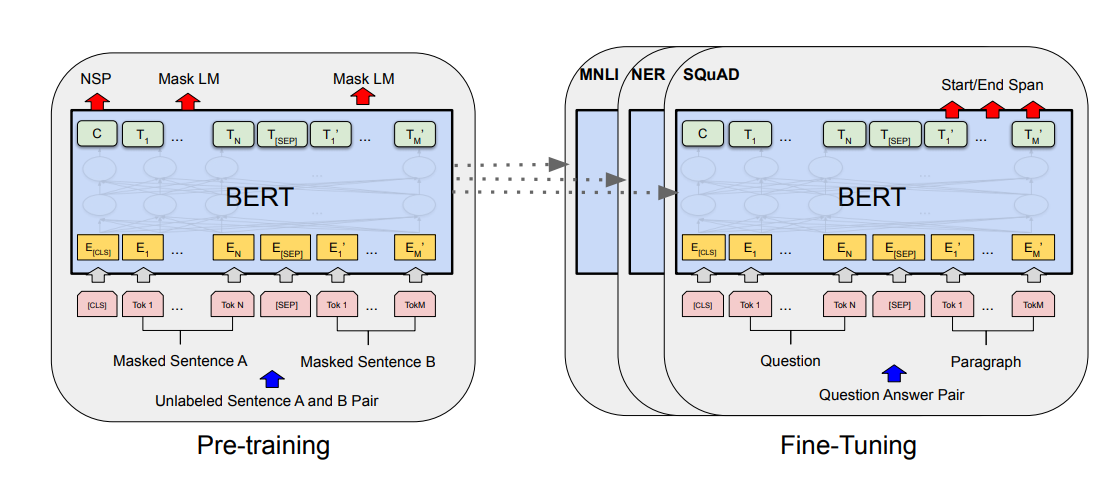

In [6]:
from IPython.display import Image
Image(filename='bert.png')

* Overall pre-training and fine-tuning procedures for BERT.

* Apart from output layers, the **same architectures** are used in both **pre-training** and **fine-tuning**. 

* The same pre-trained model parameters are used to initialize models for **different down-stream tasks**. 

* During fine-tuning, all parameters are fine-tuned. 
[CLS] is a special symbol added in front of every input example, and [SEP] is a special separator token (e.g. separating questions/answers).

## Word embeddings
* Context-free models such as word2vec or GloVe
* Contextual representation (each word is based on the other words in the sentence)

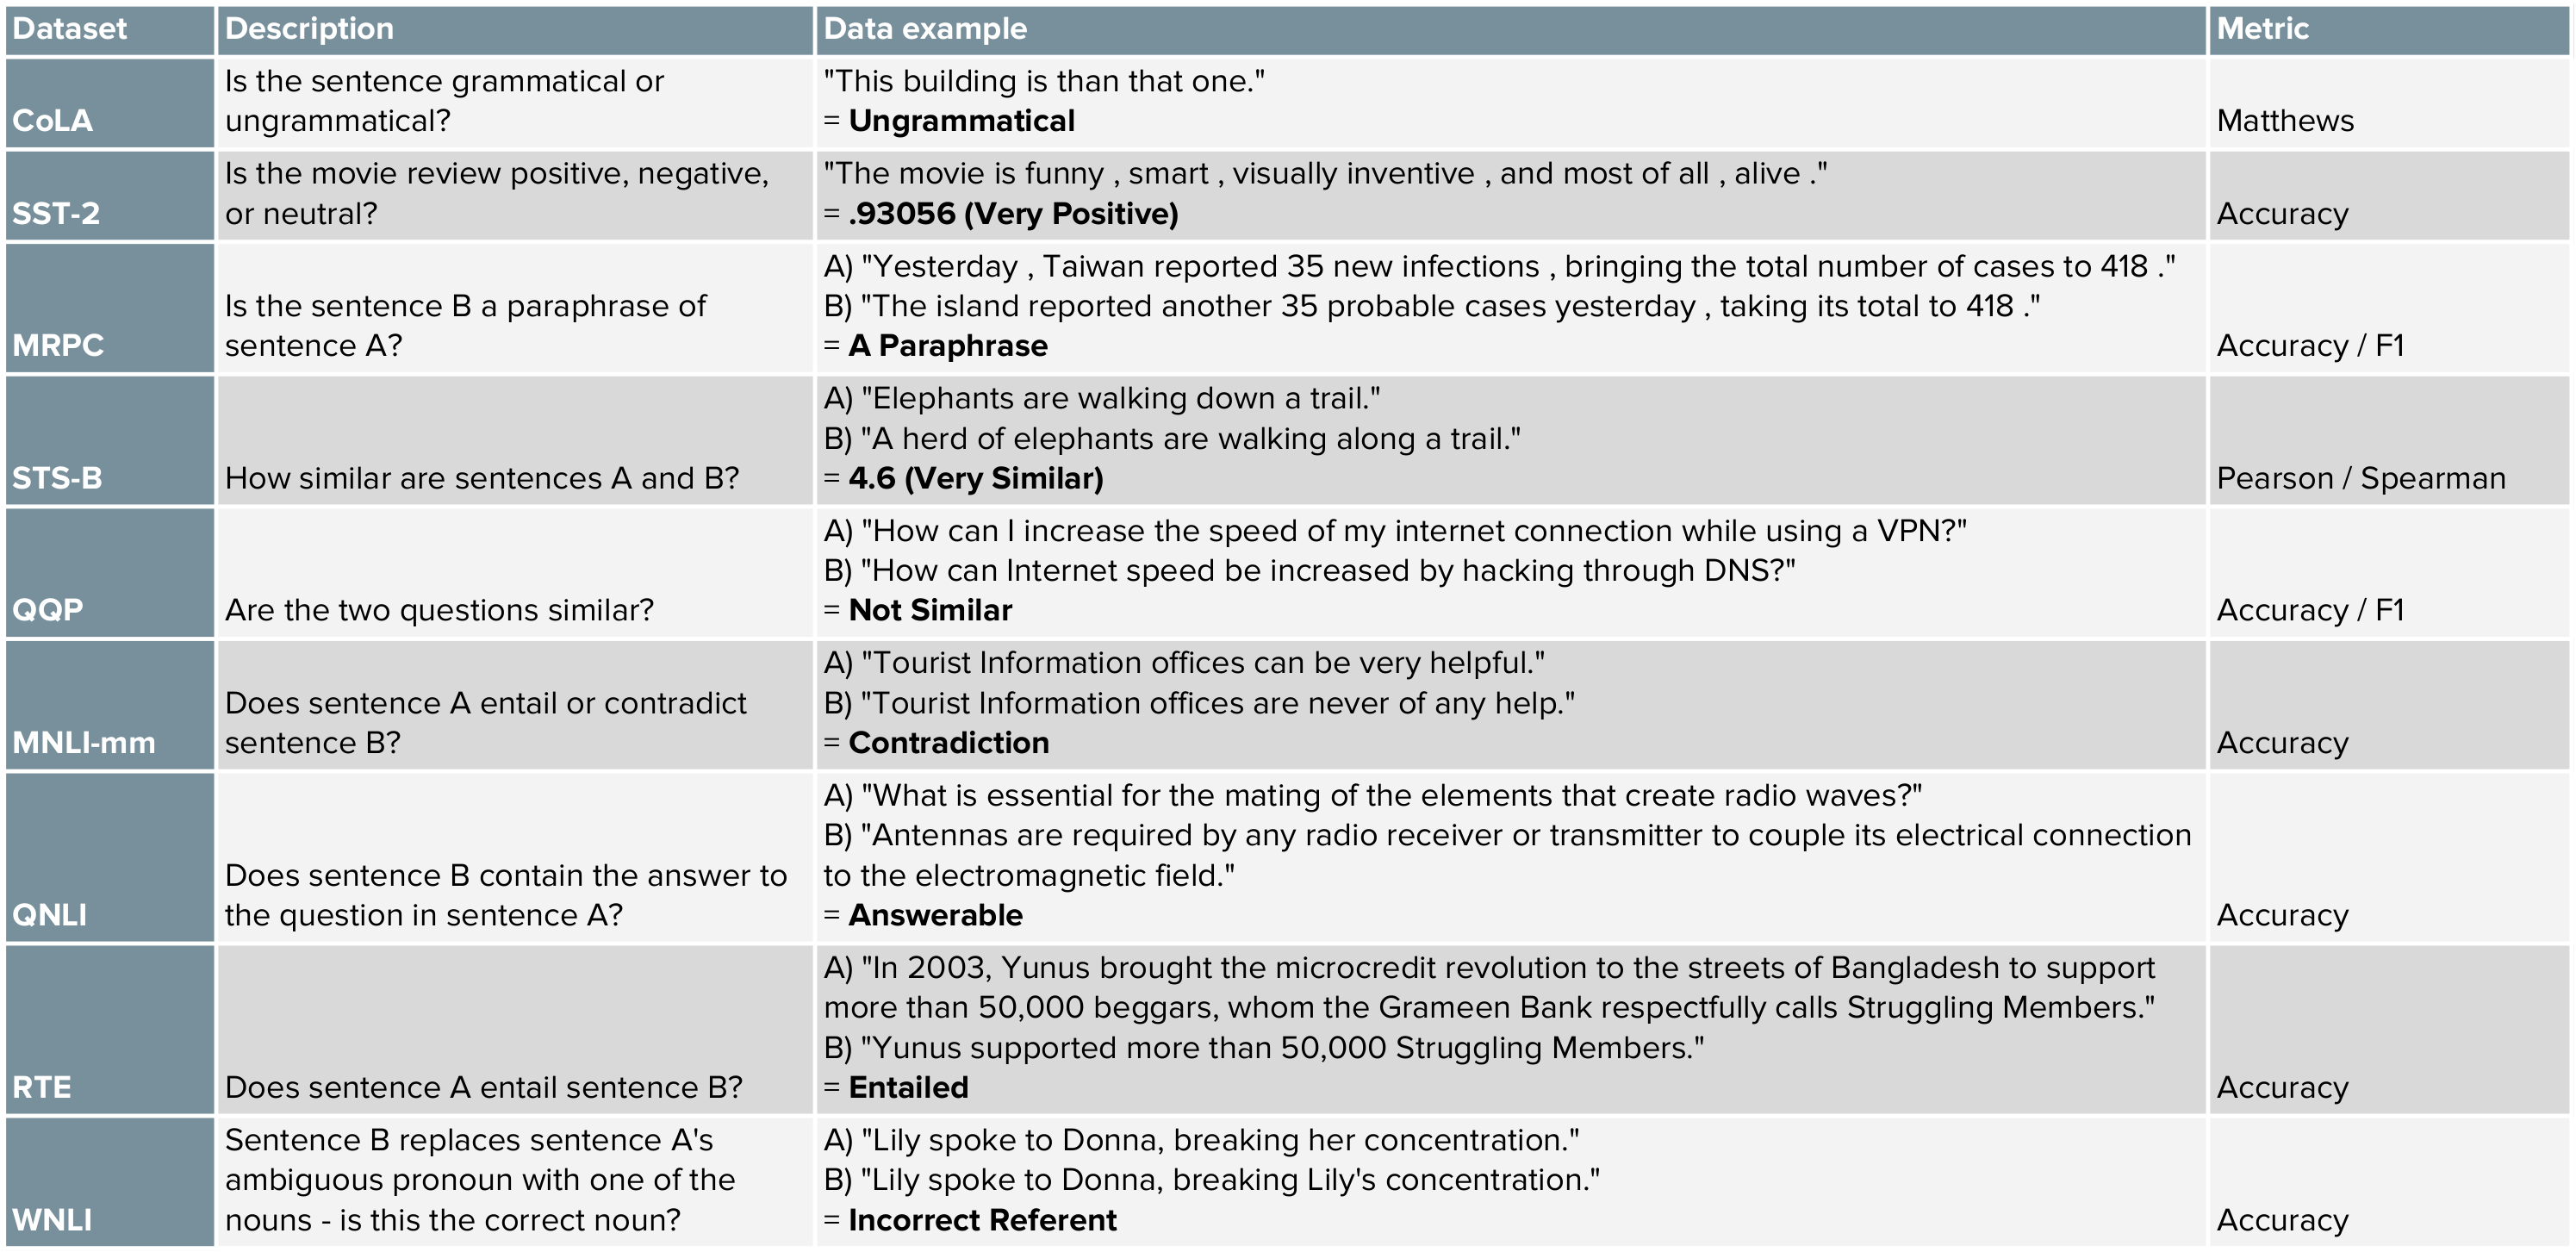

In [6]:
from IPython.display import Image
Image(filename='glue.png')

# BERTurk: Turkish Bert Pre-trained model
https://github.com/stefan-it/turkish-bert

* The current version of the model is trained on a filtered and sentence segmented version of 
    * the Turkish OSCAR corpus, 
    * a recent Wikipedia dump, 
    * various OPUS corpora 
    * and a special corpus provided by Kemal Oflazer.

* The final training corpus has a size of 35GB and 44,004,976,662 tokens.

* Thanks to Google's TensorFlow Research Cloud (TFRC) we can train both cased and uncased models on a TPU v3-8. 



# How to train 

A detailed cheatsheet of how the models were trained, can be found 


https://github.com/stefan-it/turkish-bert/blob/master/CHEATSHEET.md
    

# SimpleTransformers
https://simpletransformers.ai/docs/usage/

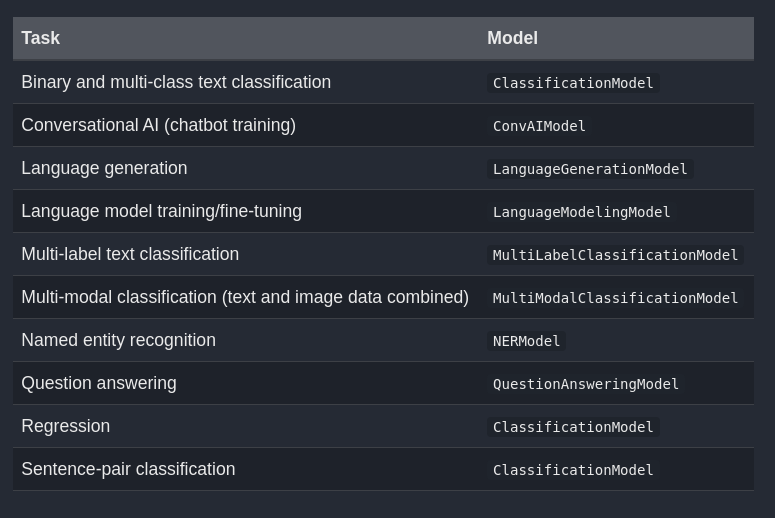

In [7]:
Image(filename='st.png')

# Turkish NLP down-stream tasks
* Sentiment Analysis
* Ner model

## 1-Sentiment Analysis
* This model can get up to %95 success rate on our dataset 
* To see the training detail and the model performce, check the link \
 https://huggingface.co/savasy/bert-base-turkish-sentiment-cased
 
 https://github.com/savasy/TurkishSentimentAnalysis
 
 

### Usage

In [8]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
# load model, it takes time since it loads over 500 MB model file
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

# create pipeline
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

### Example usage
* Label_1: positive
* Label_0: negative

In [10]:
p= sa("bu telefon modelleri çok kaliteli")
print(p)
#[{'label': 'LABEL_1', 'score': 0.9871089}]
print (p[0]['label']=='LABEL_1')
#True


[{'label': 'LABEL_1', 'score': 0.6539757251739502}]
True


In [13]:
p= sa("Film çok kötü ve oyuncular çok sahteydi")
print(p)
#[{'label': 'LABEL_0', 'score': 0.9975505}]
print (p[0]['label']=='LABEL_1')
#False

[{'label': 'LABEL_0', 'score': 0.9989525079727173}]
False


In [14]:
def sa2(inp):
    p=sa(inp)
    if p[0]['label']=='LABEL_1':
        print("Positive - with score of {}".format(p[0]['score']))
    else:
        print("Negative - with score of {}".format(p[0]['score']))
    
    

In [16]:
sa2("hahaha")

Positive - with score of 0.9846484065055847


### Test your entire dataset

> Suppose your file has lots of lines of comment and label (1 or 0) (tab seperated)

```
 # yourfile.tsv
 comment1 ... \t label
 comment2 ... \t label

 comment-n ... \t  label
...
```



# your test code

```
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

f="/path/to/your/file/yourfile.tsv"

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

i,crr=0,0
for line in open(f):
 lines=line.strip().split("\t")
 if len(lines)==2:
  i=i+1
  if i%100==0:
   print(i)
  pred= sa(lines[0])
  pred=pred[0]["label"].split("_")[1]
  if pred== lines[1]:
   crr=crr+1

print(crr, i, crr/i)

```

How to train and fine-tune your own model, please check 

https://github.com/savasy/TurkishSentimentAnalysis

# 2- Name Entity Recognizer (NER)
This model can get %95 accuracy, currently it works with PER, LOC, and ORG

check huugingface model repo and ner pipeline repo for other detail

* https://huggingface.co/savasy/bert-base-turkish-ner-cased
* https://github.com/savasy/Turkish-Bert-Based-NERModel


## Example usage

In [17]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

# load model
model = AutoModelForTokenClassification.from_pretrained("savasy/bert-base-turkish-ner-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-ner-cased")

ner=pipeline('ner', model=model, tokenizer=tokenizer)
res=ner("Mustafa Kemal Atatürk 19 Mayıs 1919'da Samsun'a ayak bastı.")
for r in res:
    print(r)


{'word': 'Mustafa', 'score': 0.9938516616821289, 'entity': 'B-PER', 'index': 1}
{'word': 'Kemal', 'score': 0.9881671071052551, 'entity': 'I-PER', 'index': 2}
{'word': 'Atatürk', 'score': 0.9957979321479797, 'entity': 'I-PER', 'index': 3}
{'word': 'Samsun', 'score': 0.9059983491897583, 'entity': 'B-LOC', 'index': 9}


In [18]:
res=ner("Sait Faik Abasıyanık ömrünün sonuna kadar yazları Burgaz Adadaki köşklerinde kalmıştır")

for r in res:
    print(r)


{'word': 'Sait', 'score': 0.999457597732544, 'entity': 'B-PER', 'index': 1}
{'word': 'Faik', 'score': 0.9992268085479736, 'entity': 'I-PER', 'index': 2}
{'word': 'Ab', 'score': 0.9992337226867676, 'entity': 'I-PER', 'index': 3}
{'word': '##asıya', 'score': 0.9988555312156677, 'entity': 'I-PER', 'index': 4}
{'word': '##nı', 'score': 0.9977203011512756, 'entity': 'I-PER', 'index': 5}
{'word': '##k', 'score': 0.9331614971160889, 'entity': 'I-PER', 'index': 6}
{'word': 'Bur', 'score': 0.9250907897949219, 'entity': 'B-LOC', 'index': 13}
{'word': '##gaz', 'score': 0.8786793351173401, 'entity': 'I-LOC', 'index': 14}
{'word': 'Ada', 'score': 0.9805734753608704, 'entity': 'I-LOC', 'index': 15}


# 3- Question Answering  (SQuAD) for Turkish

This model is tranied with TQuAD dataset (which is SQuAD-like data set of Turkish)

https://github.com/TQuad/turkish-nlp-qa-dataset

> This dataset is the Turkish Question & Answer dataset on Turkish & Islamic Science History within the scope of Teknofest 2018 Artificial Intelligence competition.


# Loading model

In [19]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
import torch
 # LOAD MODEL
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-squad")
model = AutoModelForQuestionAnswering.from_pretrained("savasy/bert-base-turkish-squad")

qa=pipeline("question-answering", model=model, tokenizer=tokenizer)

In [20]:
sait="ABASIYANIK, Sait Faik. Hikayeci (Adapazarı 23 Kasım 1906-İstanbul 11 Mayıs 1954). \
İlk öğrenimine Adapazarı’nda Rehber-i Terakki Mektebi’nde başladı. İki yıl kadar Adapazarı İdadisi’nde okudu.\
İstanbul Erkek Lisesi’nde devam ettiği orta öğrenimini Bursa Lisesi’nde tamamladı (1928). İstanbul Edebiyat \
Fakültesi’ne iki yıl devam ettikten sonra babasının isteği üzerine iktisat öğrenimi için İsviçre’ye gitti. \
Kısa süre sonra iktisat öğrenimini bırakarak Lozan’dan Grenoble’a geçti. Üç yıl başıboş bir edebiyat öğrenimi \
gördükten sonra babası tarafından geri çağrıldı (1933). Bir müddet Halıcıoğlu Ermeni Yetim Mektebi'nde Türkçe \
gurup dersleri öğretmenliği yaptı. Ticarete atıldıysa da tutunamadı. Bir ay Haber gazetesinde adliye muhabirliği\
yaptı (1942). Babasının ölümü üzerine aileden kalan emlakin geliri ile avare bir hayata başladı. Evlenemedi.\
Yazları Burgaz adasındaki köşklerinde, kışları Şişli’deki apartmanlarında annesi ile beraber geçen bu fazla \
içkili bohem hayatı ömrünün sonuna kadar sürdü."

In [27]:
print(qa(question="Ne zaman avare bir hayata başladı?", context=sait))

{'score': 0.9998962879427609, 'start': 752, 'end': 775, 'answer': 'Babasının ölümü üzerine'}


In [28]:
print(qa(question="Sait Faik hangi Lisede orta öğrenimini tamamladı?", context=sait))

{'score': 0.9957320524499025, 'start': 246, 'end': 262, 'answer': 'Bursa Lisesi’nde'}


In [33]:
print(qa(question="Sait Faik kimdir?", context=sait))

{'score': 0.2928041405302846, 'start': 23, 'end': 31, 'answer': 'Hikayeci'}


In [31]:
# Ask your self ! type your question
print(qa(question="...?", context=sait))

{'score': 0.008398412548299483, 'start': 75, 'end': 81, 'answer': '1954).'}


In [34]:
# source: wikipedia
ataturk="Atatürk  modern, ilerici ve laik bir ulus devleti oluşturmak için politik, ekonomik ve kültürel alanlarda sekülarist ve milliyetçi \
 karakterdeki reformlarını başlattı. Yabancılara tanınan ekonomik imtiyazlar kaldırıldı ve onlara ait üretim araçları ve demiryolları millîleştirildi. \
 Tevhîd-i Tedrîsât Kanunu ile eğitim Türk hükûmetinin denetimine girdi. Seküler ve bilimsel eğitim esas alındı. Binlerce yeni okul inşa edildi. \
 İlköğretim ücretsiz ve zorunlu hale getirildi. Yabancı okullar devlet denetimine alındı. Köylülerin sırtına yüklenen ağır vergiler azaltıldı. \
 Erkeklerin serpuş ve kıyafetlerinde değişiklikler yapıldı. Takvim, saat ve ölçülerde değişikliklere gidildi. \
 Mecelle kaldırılarak yerine seküler Türk Kanunu Medenisi yürürlüğe konuldu. Kadınların sivil ve politik hakları pek çok Batı ülkesinden önce tanındı. \
 Çok eşlilik yasaklandı. Kadınların şahitliği ve miras hakkı erkeklerinkiyle eşit hale getirildi. Benzer şekilde, dünyanın çoğu ülkesinden önce olarak \
 Türkiye'de kadınların ilkin yerel seçimlerde (1930), sonra genel seçimlerde (1934) seçme ve seçilme hakkı tanındı. Ceza ve borçlar hukukunda \
 seküler yasalar yürürlüğe konuldu. Sanayi Teşvik Kanunu kabul edildi. Toprak Reformu için çabalandı.[3] Arap harfleri temelli Osmanlı alfabesinin yerine \
  Latin harfleri temelli yeni Türk alfabesi kabul edildi. Halkı okuryazar kılmak için eğitim seferberliği başlatıldı. Üniversite Reformu gerçekleştirildi. \
  Birinci Beş Yıllık Sanayi Planı yürürlüğe konuldu. Sınıf ve statü farkı gözeten lâkap ve unvanlar kaldırıldı ve soyadları yürürlüğe konuldu. \
  Homojen ve birleşmiş bir ulus yaratılması için Türkleştirme politikası yürütüldü.[4][5][6] Türk olmayan azınlıklar kamuoyunda Türkçe konuşmaya zorlandı,[7] \
  Türkçe olmayan toponomiler ve azınlıkların soyadları Türkçeye çevrildi.[8][9]"

In [35]:
print(qa(question="Kimlere ekonomik imtiyaz kaldırıldı?", context=ataturk))

{'score': 0.9999153630840389, 'start': 168, 'end': 179, 'answer': 'Yabancılara'}


In [36]:
print(qa(question="tüm bu devrimleri kim yaptı?", context=ataturk))

{'score': 1.3106855607656159e-09, 'start': 0, 'end': 8, 'answer': 'Atatürk'}


In [37]:
# Ask your self ! type your question
print(qa(question="...?", context=ataturk))

{'score': 9.457521791650177e-13, 'start': 1434, 'end': 1484, 'answer': 'Birinci Beş Yıllık Sanayi Planı yürürlüğe konuldu.'}


In [41]:
text="Bugün 19 Mayıs Atatürk'ü Anma, Gençlik ve Spor Bayramı. Mustafa Kemal Atatürk, 19 Mayıs 1919'da Bandırma Vapuru ile Samsun'a çıkmış ve İtilaf Devletleri'nin işgaline karşı Kurtuluş Savaşı'nı başlatmıştı. Siyaset Bilimci Prof. Dr. Ahmet Demirel, Mustafa Kemal'in askeri başarılarıyla tanınan bir Osmanlı paşasıyken tüm yurt çapında saygı duyulan siyasi bir lidere dönüşmesinin ilk adımı olan 19 Mayıs 1919'un öncesi ve sonrasında neler yaşandığını BBC Türkçe'ye anlattı."
print(qa(question="19 Mayıs ne bayramıdır?", context=text))

{'score': 0.9996181455871991, 'start': 15, 'end': 55, 'answer': "Atatürk'ü Anma, Gençlik ve Spor Bayramı."}


In [39]:
print(qa(question="Atatürk Samsun'a ne zaman çıktı?", context=text))

{'score': 0.532583902069458, 'start': 79, 'end': 95, 'answer': "19 Mayıs 1919'da"}


In [40]:
print(qa(question="Atatürk Samsun'da neyi başlattı?", context=text))

{'score': 0.9171123050634726, 'start': 172, 'end': 190, 'answer': "Kurtuluş Savaşı'nı"}


In [43]:
print(qa(question="Kim Samsun'a çıktı?", context=text))

{'score': 0.9931532642026397, 'start': 56, 'end': 78, 'answer': 'Mustafa Kemal Atatürk,'}


# 4 - Text Summarization

...will be soon

# 5- Text/Document Classification 

In this study we fine-tune 7 classes Turkish news dataset


The following Turkish benchmark dataset is used for fine-tuning

https://www.kaggle.com/savasy/ttc4900

 * 'LABEL_0': 'dunya 
 * 'LABEL_1': 'ekonomi '
 * 'LABEL_2': 'kultur '
 * 'LABEL_3': 'saglik '
 * 'LABEL_4': 'siyaset '
 * 'LABEL_5': 'spor '
 * 'LABEL_6': 'teknoloji'

In [52]:
# import libraries
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

# load models
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-turkish-text-classification")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-turkish-text-classification")


In [53]:
# make pipeline
tc=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# apply model
res=tc("bla bla")
res
# [{'label': 'LABEL_2', 'score': 0.4753005802631378}]

[{'label': 'LABEL_2', 'score': 0.4753005802631378}]

In [45]:
code_to_label={
 'LABEL_0': 'dunya ',
 'LABEL_1': 'ekonomi ',
 'LABEL_2': 'kultur ',
 'LABEL_3': 'saglik ',
 'LABEL_4': 'siyaset ',
 'LABEL_5': 'spor ',
 'LABEL_6': 'teknoloji '}
# > 'kultur '


In [56]:
def tc2(inp):
    code_to_label={
 'LABEL_0': 'dunya ',
 'LABEL_1': 'ekonomi ',
 'LABEL_2': 'kultur ',
 'LABEL_3': 'saglik ',
 'LABEL_4': 'siyaset ',
 'LABEL_5': 'spor ',
 'LABEL_6': 'teknoloji '}
    return code_to_label[tc(inp)[0]['label']]
    

In [57]:
tc2("bla bla")

'kultur '

In [47]:
text="Bugün 19 Mayıs Atatürk'ü Anma, Gençlik ve Spor Bayramı. Mustafa Kemal Atatürk, 19 Mayıs 1919'da Bandırma Vapuru ile Samsun'a çıkmış ve İtilaf Devletleri'nin işgaline karşı Kurtuluş Savaşı'nı başlatmıştı. Siyaset Bilimci Prof. Dr. Ahmet Demirel, Mustafa Kemal'in askeri başarılarıyla tanınan bir Osmanlı paşasıyken tüm yurt çapında saygı duyulan siyasi bir lidere dönüşmesinin ilk adımı olan 19 Mayıs 1919'un öncesi ve sonrasında neler yaşandığını BBC Türkçe'ye anlattı."
code_to_label[tc(text)[0]['label']]

'siyaset '

For the details of traininig models please check

* https://github.com/savasy/TurkishTextClassification

In [65]:
from __future__ import print_function
import ipywidgets as widgets
from transformers import pipeline

task = widgets.Dropdown(
    options=['sentiment-analysis', 'ner','text classification'],
    value='ner',
    description='Task:',
    disabled=False
)

input = widgets.Text(
    value='',
    placeholder='Enter something',
    description='Your input:',
    disabled=False
)

def forward(_):
    if len(input.value) > 0:
        output=""
        if task.value == 'ner':
            output = ner(input.value)
        elif task.value == 'sentiment-analysis':
            output = sa2(input.value)
        elif task.value=='text classification':
            output = tc2(input.value)
        #else:
        #    if input.value.find('<mask>') == -1:
        #        output = nlp_fill(input.value + ' <mask>')
        #    else:
        #        output = nlp_fill(input.value)                
        if task.value=='ner':
            for o in output:
                print(o)
        else:
            print(output)
    

input.on_submit(forward)
display(task, input)

Dropdown(description='Task:', index=1, options=('sentiment-analysis', 'ner', 'text classification'), value='ne…

Text(value='', description='Your input:', placeholder='Enter something')

Positive - with score of 0.6282434463500977
None
Positive - with score of 0.6282434463500977
None
{'word': '19', 'score': 0.8775262832641602, 'entity': 'B-ORG', 'index': 2}
{'word': 'Mayıs', 'score': 0.9301057457923889, 'entity': 'I-ORG', 'index': 3}
{'word': 'Atatürk', 'score': 0.8639592528343201, 'entity': 'I-ORG', 'index': 4}
{'word': "'", 'score': 0.9471981525421143, 'entity': 'I-ORG', 'index': 5}
{'word': 'ü', 'score': 0.9104498028755188, 'entity': 'I-ORG', 'index': 6}
{'word': 'Anma', 'score': 0.7579506039619446, 'entity': 'I-ORG', 'index': 7}
{'word': 'Gençlik', 'score': 0.5082567930221558, 'entity': 'I-ORG', 'index': 9}
{'word': 've', 'score': 0.8286960124969482, 'entity': 'I-ORG', 'index': 10}
{'word': 'Spor', 'score': 0.9120631814002991, 'entity': 'I-ORG', 'index': 11}
{'word': 'Bayramı', 'score': 0.7962636947631836, 'entity': 'I-ORG', 'index': 12}
{'word': 'Mustafa', 'score': 0.9905598163604736, 'entity': 'B-PER', 'index': 14}
{'word': 'Kemal', 'score': 0.9766735434532166, '